In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import colors

In [ ]:
df=pd.read_csv('/content/sales_predictions.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
filter=df['Item_Weight'].isna()
df.loc[filter,:]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,NaN,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,NaN,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,NaN,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120
8490,FDU44,NaN,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


In [ ]:
filter2=df['Item_Identifier']=='FDP10'
df.loc[filter2,:]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
585,FDP10,19.0,Low Fat,0.128066,Snack Foods,104.3622,OUT035,2004,Small,Tier 2,Supermarket Type1,1905.5196
2623,FDP10,19.0,Low Fat,0.128815,Snack Foods,107.6622,OUT017,2007,NaN,Tier 2,Supermarket Type1,1164.4842
3382,FDP10,19.0,Low Fat,0.128289,Snack Foods,104.9622,OUT049,1999,Medium,Tier 1,Supermarket Type1,1164.4842
4585,FDP10,19.0,Low Fat,0.128090,Snack Foods,107.0622,OUT046,1997,Small,Tier 1,Supermarket Type1,1376.2086
6087,FDP10,19.0,Low Fat,0.128350,Snack Foods,106.5622,OUT045,2002,NaN,Tier 2,Supermarket Type1,1482.0708
7883,FDP10,19.0,Low Fat,0.127984,Snack Foods,107.6622,OUT013,1987,High,Tier 3,Supermarket Type1,1270.3464


In [ ]:
df.groupby(['Item_Identifier', 'Item_Weight'])[['Item_Weight']].mean()

,,Item_Weight
Item_Identifier,Item_Weight,
DRA12,11.600,11.600
DRA24,19.350,19.350
DRA59,8.270,8.270
DRB01,7.390,7.390
DRB13,6.115,6.115
...,...,...
NCZ30,6.590,6.590
NCZ41,19.850,19.850
NCZ42,10.500,10.500


In [ ]:
df['Item_Weight'] = df['Item_Weight'].fillna(df.groupby('Item_Identifier')['Item_Weight'].transform('mean'))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8519 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [ ]:
df['Item_Fat_Content'].replace({'low fat':'Low Fat', 'reg':'Regular'}, inplace=True)
df['Item_Fat_Content'].replace({'LF':'Low Fat'}, inplace=True)
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [ ]:
filter_size=df['Outlet_Size'].isna()
df.loc[filter_size,:]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
...,...,...,...,...,...,...,...,...,...,...,...,...
8502,NCH43,8.420,Low Fat,0.070712,Household,216.4192,OUT045,2002,NaN,Tier 2,Supermarket Type1,3020.0688
8508,FDW31,11.350,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
8509,FDG45,8.100,Low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,NaN,Tier 3,Grocery Store,424.7804
8514,FDA01,15.000,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232


In [ ]:
#df.groupby('Outlet_Size')['Outlet_Type'].value_counts()
df.groupby(['Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'])[['Outlet_Type']].count()


Outlet_Type
Outlet_Size Outlet_Location_Type Outlet_Type                   
High        Tier 3               Supermarket Type1          932
Medium      Tier 1               Supermarket Type1          930
            Tier 3               Supermarket Type2          928
                                 Supermarket Type3          935
Small       Tier 1               Grocery Store              528
                                 Supermarket Type1          930
            Tier 2               Supermarket Type1          930

In [ ]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [ ]:
grocery_store_filter = df['Outlet_Type'] == 'Grocery Store'

df.loc[grocery_store_filter, 'Outlet_Size'] = 'Small'
df['Outlet_Size'].value_counts()

Small     2943
Medium    2793
High       932
Name: Outlet_Size, dtype: int64

In [ ]:
df.groupby('Outlet_Size')['Outlet_Type'].value_counts()

Outlet_Size  Outlet_Type      
High         Supermarket Type1     932
Medium       Supermarket Type3     935
             Supermarket Type1     930
             Supermarket Type2     928
Small        Supermarket Type1    1860
             Grocery Store        1083
Name: Outlet_Type, dtype: int64

In [ ]:
df.groupby(['Outlet_Identifier', 'Outlet_Size'])[['Outlet_Size']].count()

,,Outlet_Size
Outlet_Identifier,Outlet_Size,
OUT010,Small,555
OUT013,High,932
OUT018,Medium,928
OUT019,Small,528
OUT027,Medium,935
OUT035,Small,930
OUT046,Small,930
OUT049,Medium,930


In [ ]:
filter_size=df['Outlet_Size'].isna()
df.loc[filter_size,:]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8,FDH17,16.20,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.20,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.00,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
33,FDO23,17.85,Low Fat,0.000000,Breads,93.1436,OUT045,2002,NaN,Tier 2,Supermarket Type1,2174.5028
46,NCP05,19.60,Low Fat,0.000000,Health and Hygiene,153.3024,OUT045,2002,NaN,Tier 2,Supermarket Type1,2428.8384
...,...,...,...,...,...,...,...,...,...,...,...,...
8501,FDW21,5.34,Regular,0.005998,Snack Foods,100.4358,OUT017,2007,NaN,Tier 2,Supermarket Type1,1508.0370
8502,NCH43,8.42,Low Fat,0.070712,Household,216.4192,OUT045,2002,NaN,Tier 2,Supermarket Type1,3020.0688
8508,FDW31,11.35,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
8514,FDA01,15.00,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232


# Data Visualización


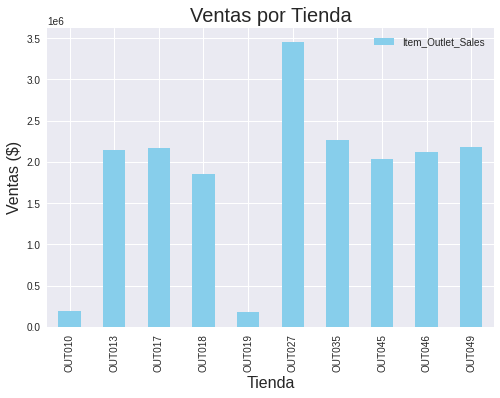

In [ ]:
#Ventas por tienda
plt.style.use('seaborn')
sales_outlet=df.groupby(['Outlet_Identifier'])[['Item_Outlet_Sales']].sum()
sales_outlet.plot.bar(color='skyblue');
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Tienda', fontsize=16)
plt.ylabel('Ventas ($)', fontsize=16)
plt.title('Ventas por Tienda', fontsize=20);


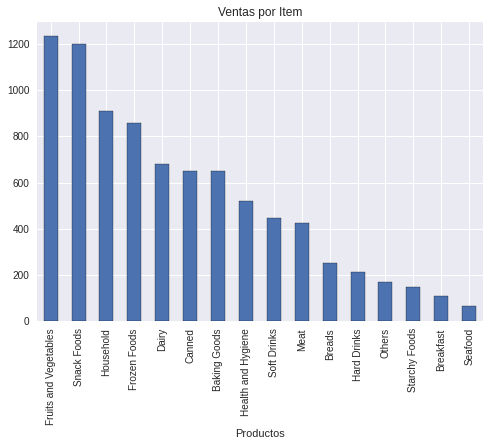

In [ ]:
plt.title('Ventas por Item');
df['Item_Type'].value_counts().plot(kind = 'bar',
                                                          edgecolor = 'black');
plt.xlabel('Productos');

In [ ]:
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

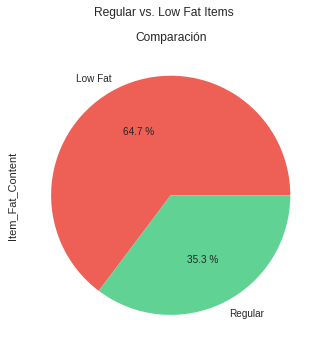

In [ ]:
plt.title('Comparación');
plt.suptitle('Regular vs. Low Fat Items');
colores = ["#EE6055","#60D394"]

df['Item_Fat_Content'].value_counts().plot(kind = 'pie', autopct="%0.1f %%", colors=colores);

# Histogramas y Diagramas de Caja

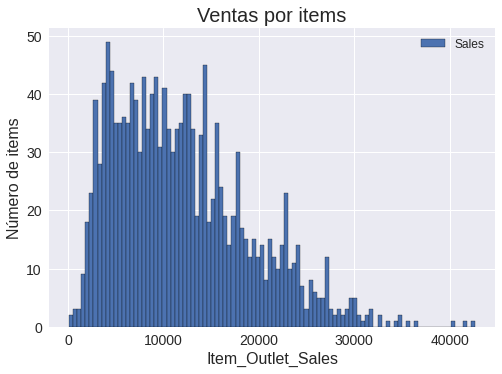

In [ ]:
#Histograma que muestra la distribución por peso de todos los items.
item_sales=df.groupby(['Item_Identifier'])['Item_Outlet_Sales'].sum()
item_sales.hist(bins=100, edgecolor='black',label = 'Sales')
plt.legend(loc='upper right', fontsize=12)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel('Item_Outlet_Sales', fontsize=16)
plt.ylabel('Número de items', fontsize=16)
plt.title('Ventas por items', fontsize=20);

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


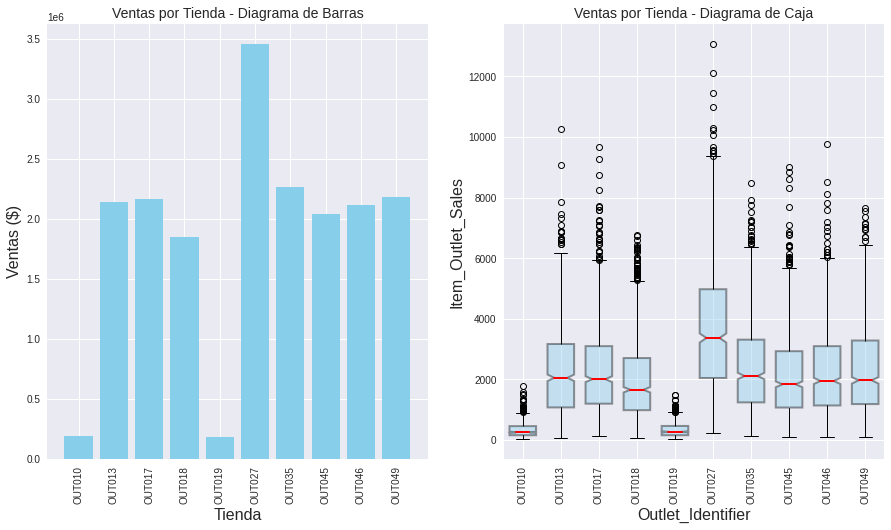

In [ ]:
#Diagrama de caja
#Muestra la distribución de todas las ventas que tiene cada tienda.
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15,8));
sales_outlet=df.groupby(['Outlet_Identifier'])[['Item_Outlet_Sales']].sum()
axes[0].bar(sales_outlet.index,sales_outlet.values.ravel(),color='skyblue')
axes[0].tick_params(axis='x', labelrotation=90)
axes[0].set_xlabel('Tienda', fontsize=16)
axes[0].set_ylabel('Ventas ($)', fontsize=16)
axes[0].set_title('Ventas por Tienda - Diagrama de Barras', fontsize=14);



axes[1].boxplot([df.loc[df.Outlet_Identifier=='OUT010','Item_Outlet_Sales']
              ,df.loc[df.Outlet_Identifier=='OUT013','Item_Outlet_Sales']
              ,df.loc[df.Outlet_Identifier=='OUT017','Item_Outlet_Sales']
              ,df.loc[df.Outlet_Identifier=='OUT018','Item_Outlet_Sales']
              ,df.loc[df.Outlet_Identifier=='OUT019','Item_Outlet_Sales']
              ,df.loc[df.Outlet_Identifier=='OUT027','Item_Outlet_Sales']
              ,df.loc[df.Outlet_Identifier=='OUT035','Item_Outlet_Sales']
              ,df.loc[df.Outlet_Identifier=='OUT045','Item_Outlet_Sales']
              ,df.loc[df.Outlet_Identifier=='OUT046','Item_Outlet_Sales']
              ,df.loc[df.Outlet_Identifier=='OUT049','Item_Outlet_Sales']
              ],
           labels=sales_outlet.index,             
           notch = True,
           widths = .7,
           patch_artist=True,
           medianprops = dict(linestyle='-', linewidth=2, color='red'),
           boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'skyblue', alpha = .4)
          );
axes[1].tick_params(axis='x', labelrotation=90)
axes[1].set_xlabel('Outlet_Identifier', fontsize=16)
axes[1].set_ylabel('Item_Outlet_Sales', fontsize=16)
axes[1].set_title('Ventas por Tienda - Diagrama de Caja', fontsize=14);

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Text(0.5, 1.0, 'Ventas por Item_Type - Diagrama de Caja')

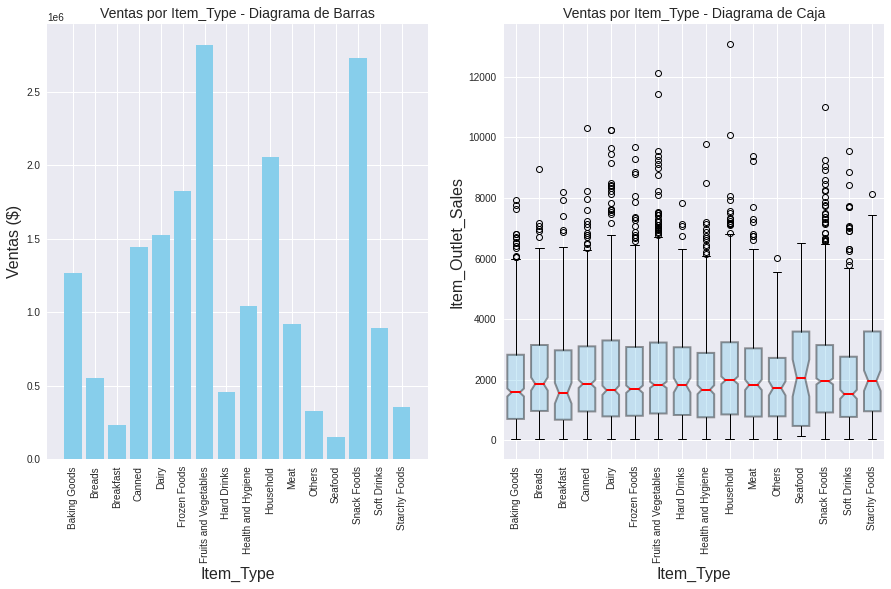

In [ ]:

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15,8));
sales_item=df.groupby(['Item_Type'])[['Item_Outlet_Sales']].sum()

axes[0].bar(sales_item.index, sales_item.values.ravel(), color='skyblue')
axes[0].tick_params(axis='x', labelrotation=90)
axes[0].set_xlabel('Item_Type', fontsize=16)
axes[0].set_ylabel('Ventas ($)', fontsize=16)
axes[0].set_title('Ventas por Item_Type - Diagrama de Barras', fontsize=14);

tipos_item=sales_item.index
axes[1].boxplot([df.loc[df.Item_Type==tipos_item[0],'Item_Outlet_Sales']
              ,df.loc[df.Item_Type==tipos_item[1],'Item_Outlet_Sales']
              ,df.loc[df.Item_Type==tipos_item[2],'Item_Outlet_Sales']
              ,df.loc[df.Item_Type==tipos_item[3],'Item_Outlet_Sales']
              ,df.loc[df.Item_Type==tipos_item[4],'Item_Outlet_Sales']
              ,df.loc[df.Item_Type==tipos_item[5],'Item_Outlet_Sales']
              ,df.loc[df.Item_Type==tipos_item[6],'Item_Outlet_Sales']
              ,df.loc[df.Item_Type==tipos_item[7],'Item_Outlet_Sales']
              ,df.loc[df.Item_Type==tipos_item[8],'Item_Outlet_Sales']
              ,df.loc[df.Item_Type==tipos_item[9],'Item_Outlet_Sales']
              ,df.loc[df.Item_Type==tipos_item[10],'Item_Outlet_Sales']
              ,df.loc[df.Item_Type==tipos_item[11],'Item_Outlet_Sales']
              ,df.loc[df.Item_Type==tipos_item[12],'Item_Outlet_Sales']
              ,df.loc[df.Item_Type==tipos_item[13],'Item_Outlet_Sales']
              ,df.loc[df.Item_Type==tipos_item[14],'Item_Outlet_Sales']
              ,df.loc[df.Item_Type==tipos_item[15],'Item_Outlet_Sales']
              ],
           labels=tipos_item,             
           notch = True,
           widths = .7,
           patch_artist=True,
           medianprops = dict(linestyle='-', linewidth=2, color='red'),
           boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'skyblue', alpha = .4)
          );
#plt.xticks(fontsize = 16, rotation=90 )
#plt.yticks(fontsize = 16)
axes[1].tick_params(axis='x', labelrotation=90)
axes[1].set_xlabel('Item_Type', fontsize=16)
axes[1].set_ylabel('Item_Outlet_Sales', fontsize=16);
axes[1].set_title('Ventas por Item_Type - Diagrama de Caja', fontsize=14)



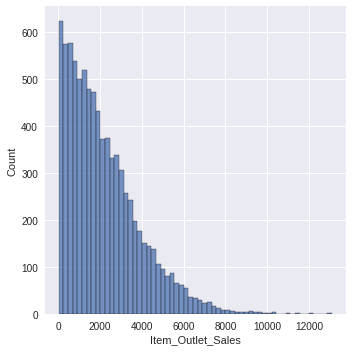

In [ ]:
sns.displot(df['Item_Outlet_Sales']);